# 车辆与驾驶员综合安全性评分体系
该综合安全性评分体系使用车辆故障数量与车辆行驶事故数量作为评分依据，对车辆及其驾驶员进行百分制评分。评分范围设置为60-100分，分数越高代表车辆及驾驶员驾驶安全性越高，分数越低则安全性越低。其中车辆故障数反应车辆的自身机械与电子设备状况，按照其影响程度的大小分为**严重（三级）**，**一般（二级）**与**轻微（一级）**故障，不同级别故障对车辆及安全性评分有不同影响。事故数反映驾驶员的驾驶安全特性，按照道交法规定将事故按其影响程度划分为**重大事故**，**一般事故**与**轻微事故**三类，不同级别的事故发生对驾驶员安全性评分有不同影响。

最终的安全性评分为车辆安全性评分与对应驾驶员的安全性评分的平均值。

## 1. 车辆安全性评分
车辆安全性评分范围为60-100分，由车辆故障指数 **$F$** 确定，车辆故障指数则由各级别的事故数**$numf_1, numf_2, numf_3$** 确定。

### 车辆故障指数 **$F$**
车辆故障指数 **$F$** 由各级别的事故数**$numf_1, numf_2, numf_3$** 确定。
$$F = w_1 * numf_1 + w_2 * numf_2 + w_3 * numf_3$$

其中，**$numf_1, numf_2, numf_3$** 分别是单位时间内（如：一年）该车发生的轻微，一般与严重故障的次数。**$w_1, w_2, w_3$** 则分别是轻微，一般与严重故障对故障指数的贡献权重，该权重在下一部分确定。

### 车辆安全性评分与车辆故障指数的关系
评分与车辆故障指数关系如下：

$$S_v = 100 \times \left\{\frac{1}{2.5 + 0.03 \times e^{(-F)}} + 0.6\right\}$$

这样根据车辆故障指数 **$F$** 计算出来的 **$S_v$** 即为车辆安全性评分。

下面绘制车辆安全性评分与车辆故障指数的关系曲线：

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [91]:
Failure = np.arange(0, 15, 0.5)
rF = 1/(2.5 + 0.03 * np.exp(Failure)) + 0.6
SafetyScore = np.around(100 * rF, 0)

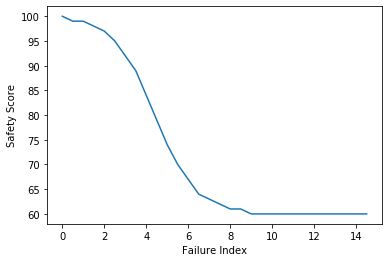

车辆故障指数：
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5]
对应的车辆安全性评分为：
[100.  99.  99.  98.  97.  95.  92.  89.  84.  79.  74.  70.  67.  64.
  63.  62.  61.  61.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.]


In [93]:
plt.plot(Failure, SafetyScore)
plt.xlabel('Failure Index')
plt.ylabel('Safety Score')
plt.show()
print('车辆故障指数：')
print(Failure)
print('对应的车辆安全性评分为：')
print(SafetyScore)

### 车辆故障指数权重

上图纵轴代表车辆安全评分，横轴为车辆故障指数。从图中可以看出，车辆安全性评分随着车辆故障指数（车辆故障数）的增加而降低，直至降低到60分。从输出数据以及曲线中可以看出，在车辆故障指数达到10后，车辆安全性评分触及最低点——60分，以此作为依据设定三级故障对车辆故障指数 **$F$** 的影响。

* **严重（三级）** 故障（如：电池内部高压互锁故障）一年出现2次（待定）即认为车辆状态不能维持车辆安全行驶，车辆安全性分数降为60，即车辆故障指数为10及以上。因此确定 **严重** 车辆故障的指数权重为 **$w_3 = 5$**。

* **一般（二级）** 故障（如：充电插座高温故障）一年出现4次（待定）即认为车辆状态不能维持车辆安全行驶，车辆安全性分数降为60，即车辆故障指数为10及以上。因此确定 **一般** 车辆故障的指数权重为 **$w_2 = 2.5$**。

* **轻微（一级）** 故障（如：充电插座高温报警）一年出现10次（待定）即认为车辆状态不能维持车辆安全行驶，车辆安全性分数降为60，即车辆故障指数为10及以上。因此确定 **轻微** 车辆故障的指数权重为 **$w_1 = 1$**。

因此车辆故障指数 **$F$** 由如下公式计算：

$$F = numf_1 + 2.5\times numf_2 + 5\times numf_3$$

## 2. 驾驶员安全性评分
驾驶员安全性评分范围为60-100分，由车辆事故指数 **$A$** 确定，车辆故障指数则由各级别的事故数**$numa_1, numa_2, numa_3$** 确定。

### 驾驶员事故指数 **$A$**
驾驶员事故指数 **$A$** 由各级别的事故数**$numa_1, numa_2, numa_3$** 确定。
$$A = w_1 * numa_1 + w_2 * numa_2 + w_3 * numa_3$$

其中，**$numa_1, numa_2, numa_3$** 分别是单位时间内（如：一年）驾驶员驾驶该车发生的轻微，一般与严重驾驶事故的次数。**$w_1, w_2, w_3$** 则分别是轻微，一般与严重事故对驾驶员事故指数的贡献权重，该权重在下一部分确定。

### 驾驶员安全性评分与驾驶员事故指数的关系
驾驶员安全性评分与驾驶员事故指数关系如下：

$$S_d = 100 \times \left\{\frac{1}{2.5 + 0.03 \times e^{(-A)}} + 0.6\right\}$$

这样根据驾驶员事故指数 **$A$** 计算出来的 **$S_d$** 即为驾驶员安全性评分。

下面绘制驾驶员安全性评分与车辆故障指数的关系曲线：

In [94]:
Accident = np.arange(0, 15, 0.5)
rA = 1/(2.5 + 0.03 * np.exp(Accident)) + 0.6
SafetyScore = np.around(100 * rA, 0)

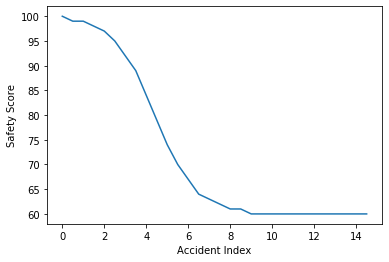

驾驶员事故指数：
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5]
对应的驾驶员安全性评分为：
[100.  99.  99.  98.  97.  95.  92.  89.  84.  79.  74.  70.  67.  64.
  63.  62.  61.  61.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.]


In [95]:
plt.plot(Failure, SafetyScore)
plt.xlabel('Accident Index')
plt.ylabel('Safety Score')
plt.show()
print('驾驶员事故指数：')
print(Failure)
print('对应的驾驶员安全性评分为：')
print(SafetyScore)

### 驾驶员事故指数权重

上图纵轴代表驾驶员安全性评分，横轴为驾驶员事故指数。从图中可以看出，驾驶员安全性评分随着驾驶员事故指数（驾驶员事故数）的增加而降低，直至降低到60分。从输出数据以及曲线中可以看出，在驾驶员事故指数达到10后，驾驶员安全性评分触及最低点——60分，以此作为依据设定三级事故对驾驶员事故指数 **$A$** 的影响。

* **重大** 事故一年出现1次（待定）即认为驾驶员不能维持车辆安全行驶，驾驶员安全性分数降为60，即驾驶员事故指数为10及以上。因此确定 **重大** 事故数的指数权重为 **$w_3 = 10$**。

* **一般** 事故一年出现4次（待定）即认为驾驶员不能维持车辆安全行驶，驾驶员安全性分数降为60，即驾驶员事故指数为10及以上。因此确定 **一般** 事故数的指数权重为 **$w_2 = 2.5$**。

* **轻微** 事故一年出现10次（待定）即认为驾驶员不能维持车辆安全行驶，驾驶员安全性分数降为60，即驾驶员事故指数为10及以上。因此确定 **轻微** 事故的指数权重为 **$w_1 = 1$**。

因此驾驶员事故指数 **$A$** 由如下公式计算：

$$A = numa_1 + 2.5\times numa_2 + 5\times numa_3$$

## 3. 车辆及驾驶员综合安全性评分

最终的车辆一级驾驶员的综合安全评分 **$S$** 使用车辆安全性评分 **$S_v$** 与驾驶员安全性评分 **$S_d$** 进行平均得到，即：

$$ S = (S_v + S_d)/2 $$
**$S_v$** 为车辆安全性评分， **$S_d$** 为驾驶员安全性评分。

$$S_v = 100 \times \left\{\frac{1}{2.5 + 0.03 \times e^{(-F)}} + 0.6\right\}$$

$$S_d = 100 \times \left\{\frac{1}{2.5 + 0.03 \times e^{(-A)}} + 0.6\right\}$$

**F** 为车辆故障指数， **$A$** 为驾驶员事故指数。

$$F = numf_1 + 2.5\times numf_2 + 5\times numf_3$$

$$A = numa_1 + 2.5\times numa_2 + 5\times numa_3$$

**$numf_1, numf_2, numf_3$** 分别为单位时间内车辆发生的轻微故障，一般故障与严重故障的次数； **$numa_1, numa_2, numa_3$** 分别为单位时间内驾驶员遭遇的轻微事故，一般事故与重大事故的次数。

综合安全性评分 **$S$** 与车辆故障指数 **$F$** 与驾驶员事故指数 **$A$** 的关系描绘如下：

In [118]:
F = np.arange(0, 11, 0.5)
A = np.arange(0, 11, 0.5)

S_v = 100 * (1/(2.5 + 0.03 * np.exp(F)) + 0.6)
S_d = 100 * (1/(2.5 + 0.03 * np.exp(A)) + 0.6)

S = np.zeros((F.shape[0], A.shape[0]))

for i in range(F.shape[0]):
    for j in range(A.shape[0]):
        S[i][j] = (S_v[i] + S_d[j])/2

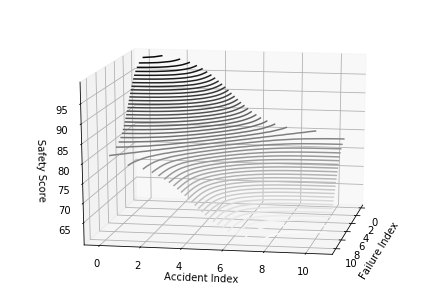

In [119]:
fig = plt.figure()
ax = Axes3D(fig)
ax.contour3D(F, A, S, 50, cmap='binary')
ax.set_xlabel('Failure Index')
ax.set_ylabel('Accident Index')
ax.set_zlabel('Safety Score')
ax.view_init(15, 10)